In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201009/neuron_activations_cnn_20200504_000_val.csv')
df.time = df.time.astype('datetime64[ns]').reset_index(drop=True) - pd.Timedelta(6, 'H') # convert to datetime64 object and offset from UTC time by 6 hours
df.describe()

,index,centroid_lon,centroid_lat,centroid_i,centroid_j,track_id,track_step,neuron_000,neuron_001,neuron_002,neuron_003,neuron_004,neuron_005,neuron_006,neuron_007,neuron_008
count,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000
mean,93591.500000,-91.936123,38.184899,512.676789,953.536413,760.630828,1.831417,-0.047964,-0.005022,-0.000554,1.071425,0.094703,1.031413,-0.002636,1.083244,-0.002223
std,54035.510731,9.784797,5.036332,185.785259,279.046159,512.925881,1.223256,0.000077,0.000066,0.000005,0.058979,0.110580,0.037499,0.000043,0.067825,0.000021
min,0.000000,-124.432205,24.692507,41.000000,49.000000,0.000000,1.000000,-0.050085,-0.007088,-0.000661,0.374966,-0.004529,0.579751,-0.003406,0.277734,-0.002402
25%,46795.750000,-98.237195,34.247490,365.000000,768.000000,337.000000,1.000000,-0.047964,-0.005033,-0.000556,1.065284,0.034600,1.027625,-0.002659,1.076262,-0.002231
50%,93591.500000,-90.886940,37.986687,507.000000,982.000000,692.000000,1.000000,-0.047947,-0.005014,-0.000555,1.085870,0.065617,1.040587,-0.002641,1.099913,-0.002225
75%,140387.250000,-85.001309,42.037640,659.000000,1159.000000,1109.000000,2.000000,-0.047934,-0.004997,-0.000553,1.104173,0.102210,1.052177,-0.002623,1.120859,-0.002219
max,187183.000000,-67.522270,49.320774,944.000000,1538.000000,2443.000000,19.000000,-0.047701,-0.004664,-0.000505,1.143204,1.421696,1.076692,-0.002191,1.165616,-0.001636


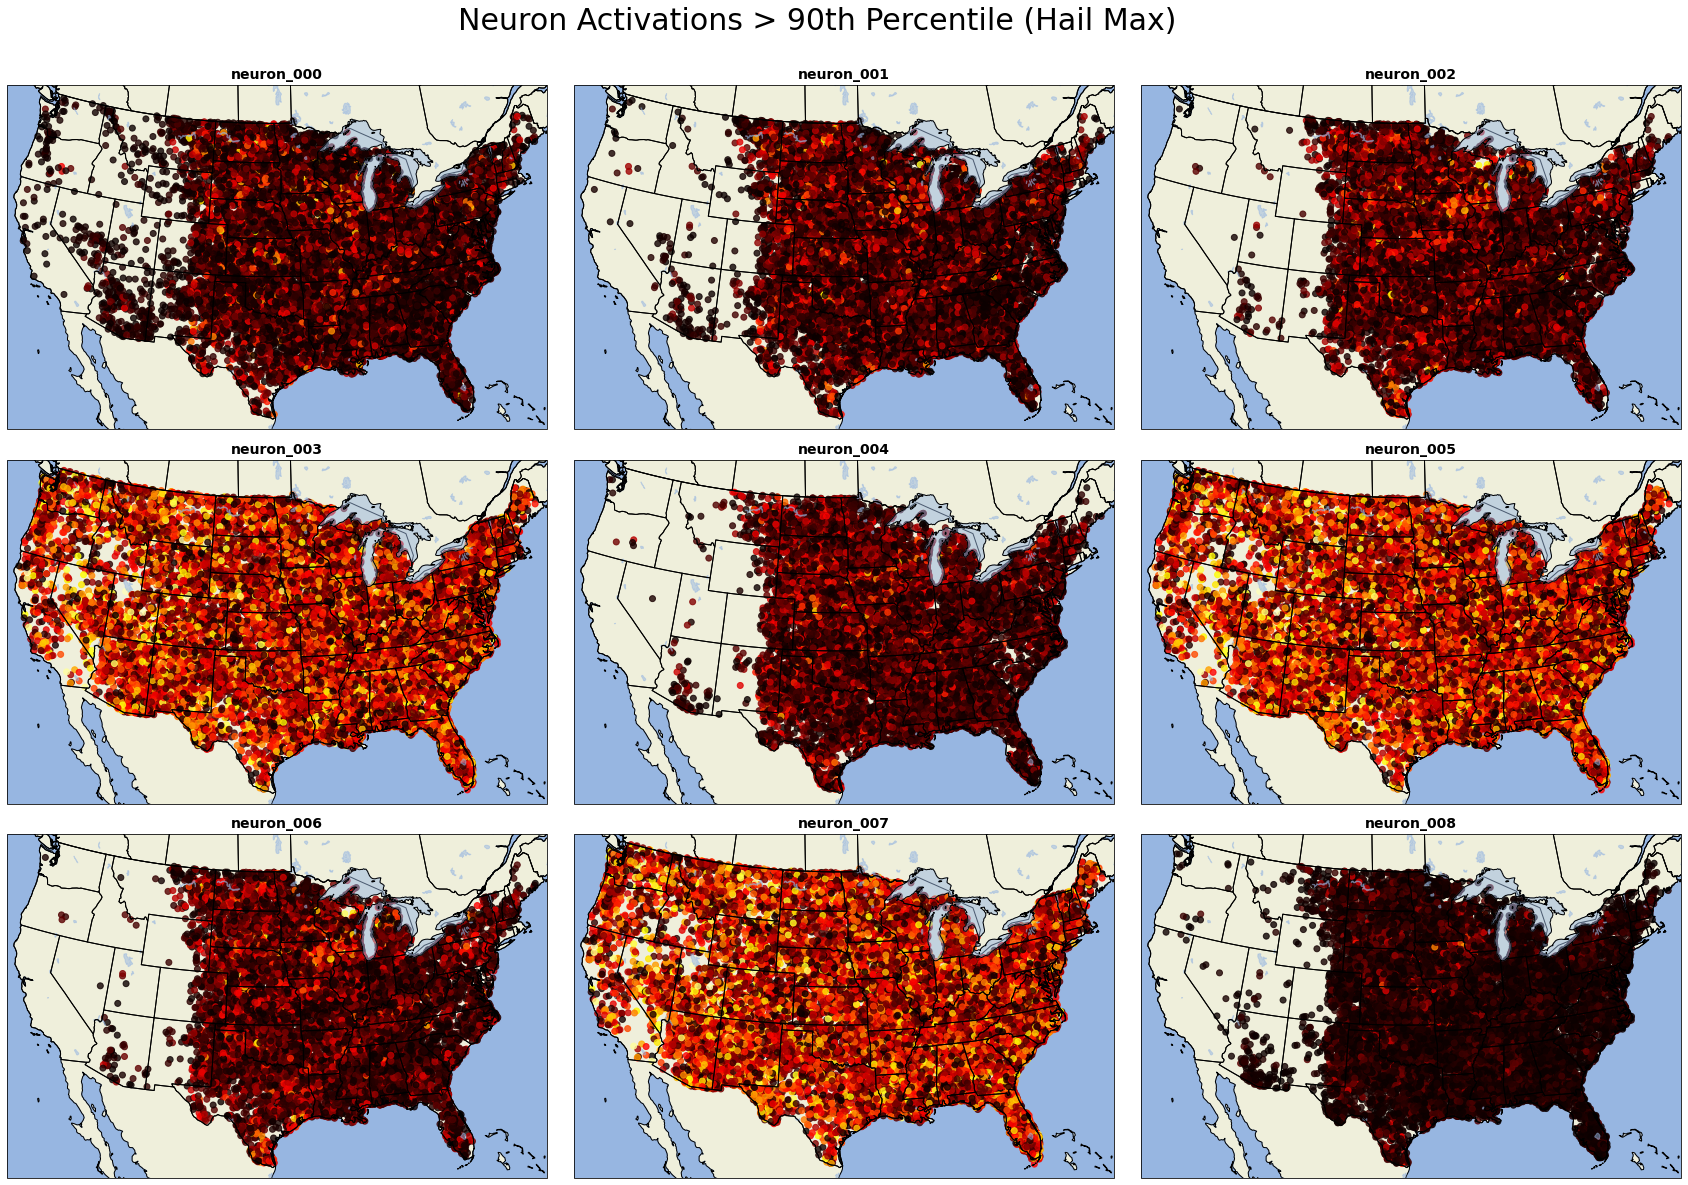

In [3]:
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
fig, axes = plt.subplots(3,3, figsize=(30, 19.6), sharex=True, sharey=True, subplot_kw={'projection': lcc})
plt.subplots_adjust(wspace=0.05, hspace=-0.1)
neurons = list(df.columns[-9:])
for i, ax in enumerate(axes.ravel()):
    ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    
    neuron = neurons[i]
    #data = df[df[neuron] < df[neuron].quantile(0.1)]
    data = df[df[neuron] > df[neuron].quantile(0.90)]
    var = data[neuron]
    #vmax = data.iloc[:,-4:].max().max()
    #vmin = data.iloc[:,-4:].min().min()
    vmin = var.quantile(0)
    vmax = var.quantile(1)
    im = ax.scatter(data['centroid_lon'], data['centroid_lat'], c=var, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), alpha=0.8, cmap='hot')
    ax.set_title(neuron, fontsize=14, fontweight='bold')
    
#fig.subplots_adjust(right=0.87)
#cbar_ax = fig.add_axes([0.88, 0.132, 0.015, 0.74])
#fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Neuron Activations > 90th Percentile (Hail Max)', fontsize=30)
fig.subplots_adjust(top=0.95)
fig.savefig('../images/Storms_greater90p_hm.png', bbox_inches='tight')

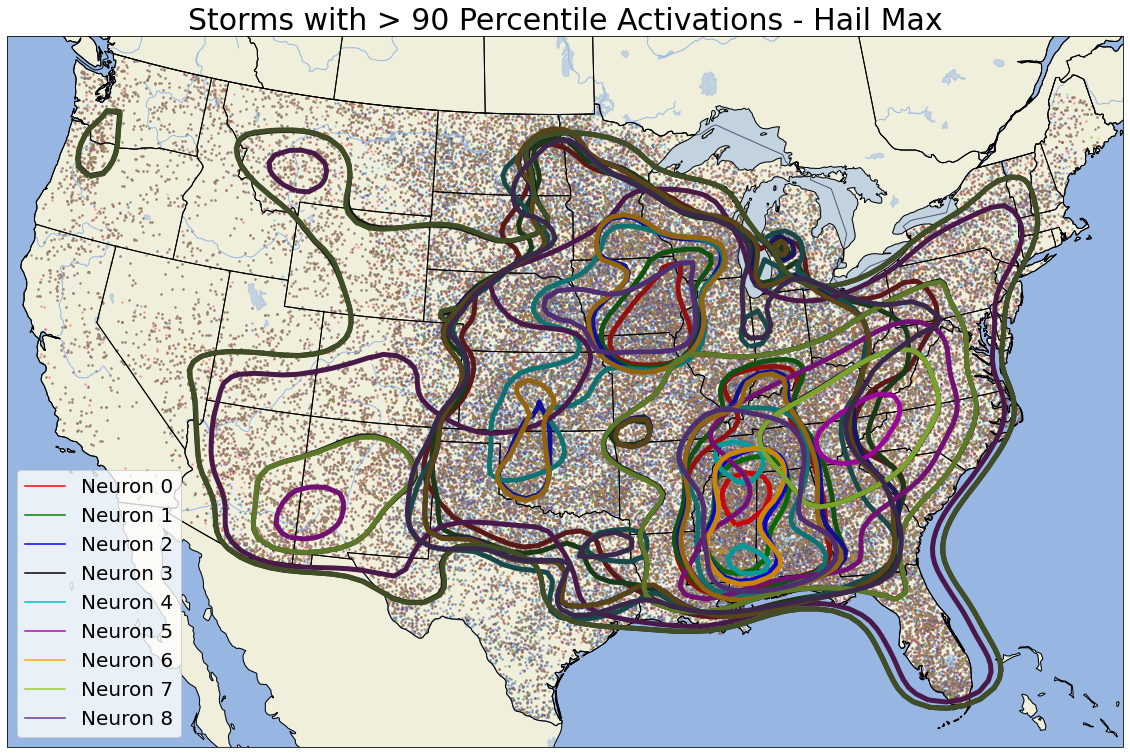

In [4]:
neurons = list(df.columns[-9:])
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']
fig = plt.figure(figsize=(20, 16))
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
ax = fig.add_subplot(1, 1, 1, projection=lcc)
ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

for i in range(9):
    neuron = neurons[i]
    data = df[df[neuron] > df[neuron].quantile(0.9)]
    #data = df[df[neuron] > 0.1]
    var = data[neuron]
    plt.scatter(data['centroid_lon'], data['centroid_lat'], transform=ccrs.PlateCarree(), label=None, color=col[i], alpha=0.25, s=2.5)
    sns.kdeplot(data['centroid_lon'], data['centroid_lat'], levels=3, transform=ccrs.PlateCarree(), linewidths=5, thresh=0, color=col[i], linestyles='-',
                label=f'Neuron {i}', cummulative=True)
    plt.legend(prop={'size': 20})
plt.title('Storms with > 90 Percentile Activations - Hail Max', fontsize=30)
fig.savefig('../images/ML_Storms_greater90_hm.png', bbox_inches='tight')

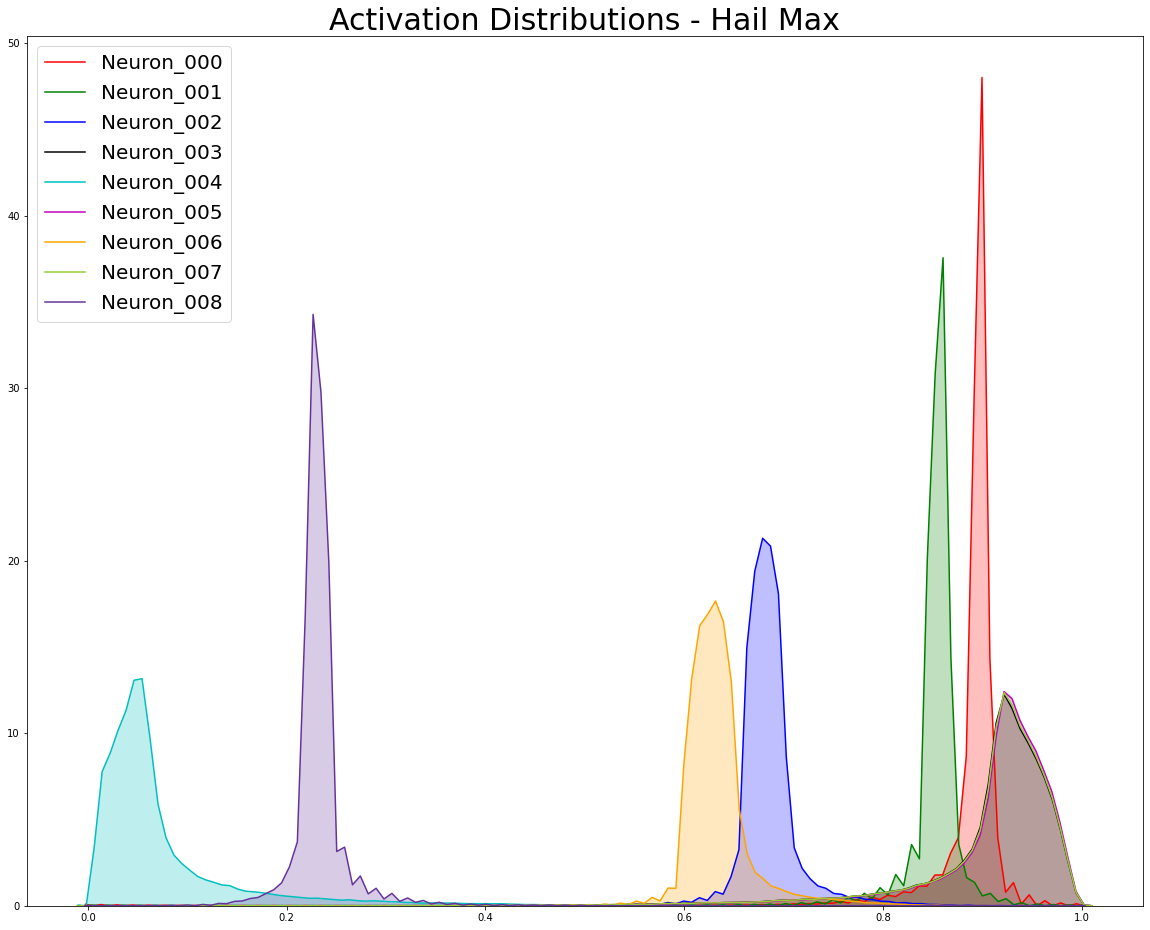

In [5]:
scaler = MinMaxScaler()
s_data = df.iloc[:, -9:]
#s_data = s_data[s_data['neuron_003'] > s_data['neuron_003'].quantile(0.90)]
sdf = pd.DataFrame(scaler.fit_transform(s_data), columns=s_data.columns)
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

plt.figure(figsize=(20,16))
for i in range(9):
    sns.kdeplot(sdf.iloc[:,i], shade=True, label=f'Neuron_00{i}', color=col[i])
    plt.legend(prop={'size': 20})
plt.ylabel('')
plt.xlabel('')
plt.title('Activation Distributions - Hail Max', fontsize=30)
plt.savefig('../images/kde_dist_hm.png', bbox_inches='tight')

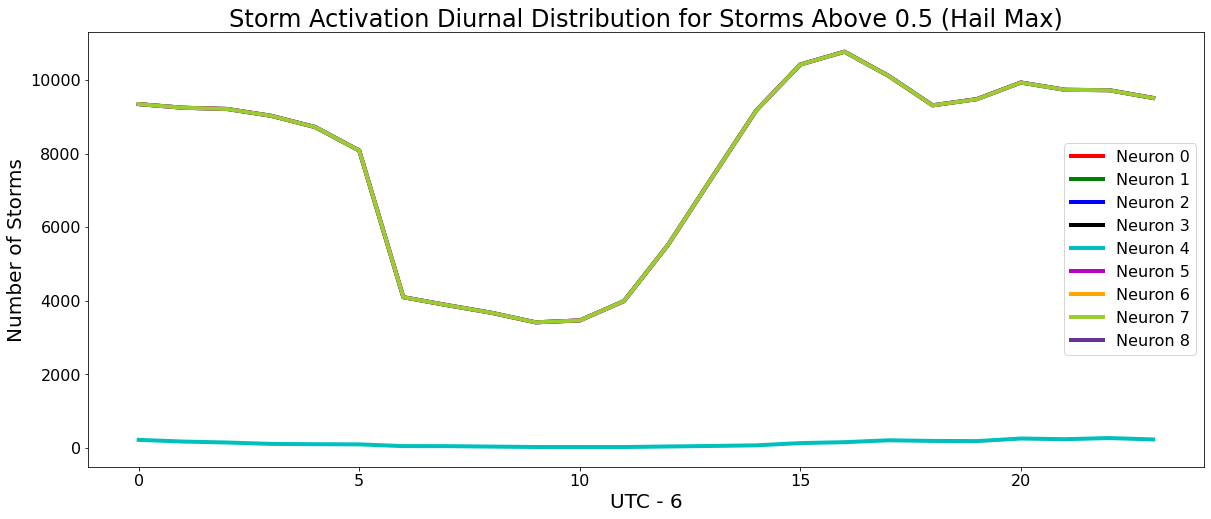

In [6]:
neurons = list(df.columns[-9:])
dff = pd.DataFrame(columns=neurons)
fig, ax = plt.subplots(figsize=(20,8))
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

for i in range(9):
    neuron = neurons[i]
    #d = df[df[neuron] > df[neuron].quantile(0.50)].groupby(df['time'].dt.hour)[neuron].count()
    d = df[df[neuron] > 0.5].groupby(df['time'].dt.hour)[neuron].count()
    dff[neuron] = d
    im = ax.plot(dff[neuron], linewidth=4, alpha=1, label=f'Neuron {i}', color=col[i])
plt.legend(prop={'size': 16})
plt.title('Storm Activation Diurnal Distribution for Storms Above 0.5 (Hail Max)', fontsize=24)
ax.set_ylabel('Number of Storms', fontsize=20)
ax.set_xlabel('UTC - 6', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.savefig('../images/Diurnal_g50p_hm.png', bbox_inches='tight')

In [7]:
neurons = df.columns[-9:]
l, ids = [], []
for n in neurons:
    t = df[df[n] == df[n].max()]['time'] + pd.Timedelta(6, 'H')
    i = df[df[n] == df[n].max()]['track_id']
    l.append(t)
    ids.append(i)

l, ids

([118732   2014-06-19 19:00:00
  Name: time, dtype: datetime64[ns],
  38241   2014-04-28 21:00:00
  Name: time, dtype: datetime64[ns],
  148662   2014-06-30 20:00:00
  Name: time, dtype: datetime64[ns],
  160200   2014-07-08 19:00:00
  Name: time, dtype: datetime64[ns],
  87111   2014-06-05 12:00:00
  Name: time, dtype: datetime64[ns],
  160200   2014-07-08 19:00:00
  Name: time, dtype: datetime64[ns],
  148662   2014-06-30 20:00:00
  Name: time, dtype: datetime64[ns],
  85245   2014-06-04 20:00:00
  Name: time, dtype: datetime64[ns],
  87111   2014-06-05 12:00:00
  Name: time, dtype: datetime64[ns]],
 [118732    1021
  Name: track_id, dtype: int64,
  38241    1025
  Name: track_id, dtype: int64,
  148662    213
  Name: track_id, dtype: int64,
  160200    641
  Name: track_id, dtype: int64,
  87111    391
  Name: track_id, dtype: int64,
  160200    641
  Name: track_id, dtype: int64,
  148662    213
  Name: track_id, dtype: int64,
  85245    629
  Name: track_id, dtype: int64,
  87111 